In [111]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import torch
import torch.nn as nn

In [112]:
Nx= 200
#cfl= 0.2
tmax = 1 # time 0 ~ 1

#viscosity_coeff = (0.01/math.pi)
viscosity_coeff = 0.02

x = np.linspace(-1,1, 200)

#t = 0  , I.C
u = -1*np.sin(math.pi * x)
dx = abs(x[1]-x[0])

dt = 0.002# cfl * dx / np.max(np.abs(u))

nt = int(tmax/ dt) #+ 1

uf = np.zeros((nt,Nx))
uf[0, :] = u

print(nt)
print(dt)
print(nt * dt, tmax )

500
0.002
1.0 1


In [113]:
def f(u):
    y = 0.5 * u**2
    yp = u
    return y, yp

In [114]:
def minmod(a,b):
    return 0.5 * (np.sign(a)+ np.sign(b)) * np.minimum(np.abs(a), np.abs(b))

In [115]:
def RHS(u, dx, viscosity_coeff):
    #diffusion term
    diffusion_term = viscosity_coeff * (np.roll(u,1)- 2*u + np.roll(u,-1))/ dx**2

    ux = minmod((u - np.roll(u,1))/dx ,  (np.roll(u,-1) - u)/dx)

    uL = np.roll(u -0.5 * dx*ux,1)
    uR = u -0.5 * dx*ux
    fL,fpL = f(uL)
    fR,fpR = f(uR)
    a = np.maximum(np.abs(fpL), np.abs(fpR))

    H =0.5 * (fL + fR - a * (uR - uL))

    conv_term  = -(np.roll(H,-1)-H)/dx

    y = conv_term + diffusion_term
    return y

In [116]:
for i in range(1, nt):
    u1 = u + dt * RHS(u,dx,viscosity_coeff)
    u = 0.5 * u + 0.5 * (u1 + dt * RHS(u1, dx,viscosity_coeff))
    uf[i, :] = u

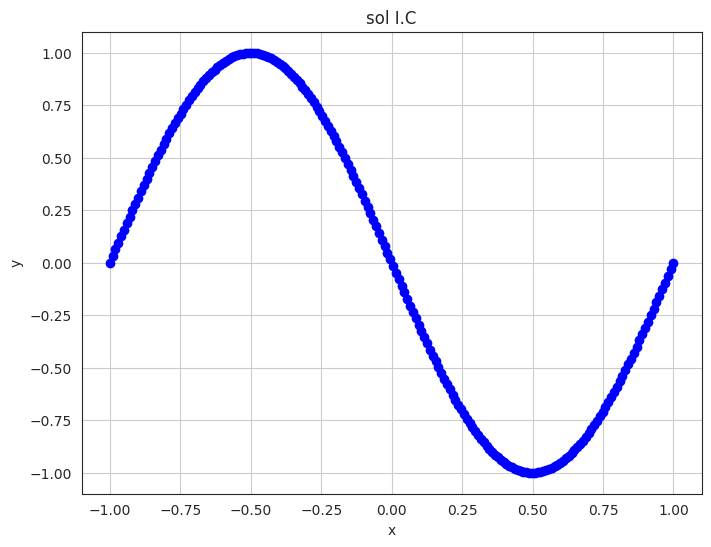

In [117]:
plt.figure(figsize=(8,6))
plt.plot(x, uf[0], '-o', color = 'b')
plt.title("sol I.C")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

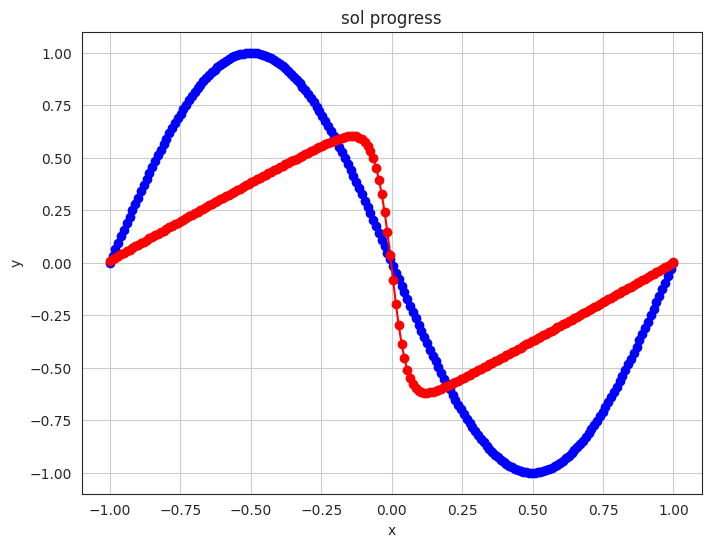

In [118]:
plt.figure(figsize=(8,6))
plt.plot(x, uf[0], '-o', color = 'b')
plt.plot(x, uf[-1], '-o', color = 'r')
plt.title("sol progress")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [119]:
uf

array([[ 1.22464680e-16,  3.15685498e-02,  6.31056313e-02, ...,
        -6.31056313e-02, -3.15685498e-02, -1.22464680e-16],
       [ 5.04816912e-03,  3.39789169e-02,  6.29057353e-02, ...,
        -6.26316775e-02, -3.39141776e-02, -4.99532216e-03],
       [ 8.06837905e-03,  3.55817910e-02,  6.32706630e-02, ...,
        -6.28071191e-02, -3.54144418e-02, -7.93565334e-03],
       ...,
       [ 8.80213458e-03,  1.65360123e-02,  2.42552594e-02, ...,
        -1.44125704e-02, -6.68651117e-03,  1.05285876e-03],
       [ 8.79440206e-03,  1.65166666e-02,  2.42243446e-02, ...,
        -1.43854607e-02, -6.67097320e-03,  1.05678648e-03],
       [ 8.78668460e-03,  1.64973705e-02,  2.41935139e-02, ...,
        -1.43584398e-02, -6.65548965e-03,  1.06069439e-03]])

In [120]:
tf = np.linspace(0,1, nt)

In [121]:
#tf

In [122]:
xf = x
xf

array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.31658291, -0.30

In [123]:
tf_tensor = torch.tensor(tf)
xf_tensor = torch.tensor(xf)

print(len(tf_tensor))
print(len(xf_tensor))

combined_tensor_x_train = torch.empty(((len(tf)*len(xf)), 2), dtype=torch.float32)
'''
we set the lenght of combined tensor x train we need separate index.
so we will create that from tf and xf. so every step we will keep repeating x
'''
index = 0
for i in range(len(tf)):
  for j in range(len(xf)):
    combined_tensor_x_train[index][0] = xf_tensor[j]
    combined_tensor_x_train[index][1] = tf_tensor[i]
    index = index + 1

print(len(combined_tensor_x_train))

500
200
100000


In [124]:
# tf_tensor
# xf_tensor
combined_tensor_x_train

tensor([[-1.0000,  0.0000],
        [-0.9899,  0.0000],
        [-0.9799,  0.0000],
        ...,
        [ 0.9799,  1.0000],
        [ 0.9899,  1.0000],
        [ 1.0000,  1.0000]])

In [125]:
your_tensor = torch.tensor(uf, dtype=torch.float32)
flattened_tensor_y_train = your_tensor.view(-1)
flattened_tensor_y_train = flattened_tensor_y_train.unsqueeze(1)

In [126]:
# your_tensor
flattened_tensor_y_train

tensor([[ 1.2246e-16],
        [ 3.1569e-02],
        [ 6.3106e-02],
        ...,
        [-1.4358e-02],
        [-6.6555e-03],
        [ 1.0607e-03]])

In [127]:
lambda_value = 2.0
print("the real value: ", viscosity_coeff, "our i-pinn value: ", lambda_value)

the real value:  0.02 our i-pinn value:  2.0


In [128]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.net = torch.nn.Sequential(
        nn.Linear(2,20),
        nn.Tanh(),
        nn.Linear(20,30),
        nn.Tanh(),
        nn.Linear(30,20),
        nn.Tanh(),
        nn.Linear(20,20),
        nn.Tanh(),
        nn.Linear(20,1),
        nn.Tanh(),
    )

  def forward(self, x):
    out = self.net(x)
    return out

In [129]:
class Net:
  def __init__(self):

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

    self.lambda_value = torch.tensor([lambda_value], requires_grad=True).float().to(device)
    self.lambda_value = nn.Parameter(self.lambda_value)
    self.model = NN().to(device)
    self.model.register_parameter('lambda_value', self.lambda_value)

    # the computatipnal domain
    self.h = 0.1
    self.k = 0.1
    x = torch.arange(-1,1+self.h, self.h)
    t = torch.arange(0,1+self.k, self.k)

    self.X = torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T

    # process the data and input the data
    self.X_train = combined_tensor_x_train
    self.y_train = flattened_tensor_y_train
    #######################################
    self.X = self.X.to(device)
    self.X.requires_grad = True

    self.X_train = self.X_train.to(device)
    self.y_train = self.y_train.to(device)

    # optimization method
    self.adam = torch.optim.Adam(self.model.parameters())
    self.criterion = torch.nn.MSELoss()
    self.iter = 1

  def loss_func(self):
    self.adam.zero_grad()

    #####################################
    y_pred = self.model(self.X_train)
    loss_data = self.criterion(y_pred, self.y_train)
    #####################################

    u = self.model(self.X)
    du_dX = torch.autograd.grad(
        u,
        self.X,
        grad_outputs = torch.ones_like(u),
        create_graph = True,
        retain_graph = True
    )[0]

    du_dt = du_dX[:,1]
    du_dx = du_dX[:,0]

    du_dXX = torch.autograd.grad(
        du_dX,
        self.X,
        grad_outputs = torch.ones_like(du_dX),
        create_graph = True,
        retain_graph = True
    )[0]

    du_dXX = du_dXX[:,0]

    # declare the pde
    lambda_pde = self.lambda_value
    loss_pde = self.criterion(du_dt + 1 * u.squeeze() * du_dx, lambda_pde * du_dXX)
    loss = loss_pde + loss_data
    loss.backward()

    if self.iter % 100 == 0:
      print("Iteration number: ", self.iter, " Loss value: ", loss.item(), " real mu: ", viscosity_coeff, " I-PINN lambda: ", self.lambda_value.item())
    self.iter = self.iter + 1
    return loss

  # training
  def train(self):
    self.model.train()

    for i in range(3000):
      self.adam.step(self.loss_func)

  def eval_(self):
    self.model.eval()

In [130]:
net = Net()
net.train()
net.model.eval()

Iteration number:  100  Loss value:  0.19604063034057617  real mu:  0.02  I-PINN lambda:  1.9036304950714111
Iteration number:  200  Loss value:  0.18493978679180145  real mu:  0.02  I-PINN lambda:  1.843956708908081
Iteration number:  300  Loss value:  0.1688341349363327  real mu:  0.02  I-PINN lambda:  1.755812644958496
Iteration number:  400  Loss value:  0.1609838455915451  real mu:  0.02  I-PINN lambda:  1.6613215208053589
Iteration number:  500  Loss value:  0.1574489325284958  real mu:  0.02  I-PINN lambda:  1.547265648841858
Iteration number:  600  Loss value:  0.15466760098934174  real mu:  0.02  I-PINN lambda:  1.4146314859390259
Iteration number:  700  Loss value:  0.15164530277252197  real mu:  0.02  I-PINN lambda:  1.2704755067825317
Iteration number:  800  Loss value:  0.1480294018983841  real mu:  0.02  I-PINN lambda:  1.1194556951522827
Iteration number:  900  Loss value:  0.143415629863739  real mu:  0.02  I-PINN lambda:  0.958761990070343
Iteration number:  1000  Loss

NN(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=30, bias=True)
    (3): Tanh()
    (4): Linear(in_features=30, out_features=20, bias=True)
    (5): Tanh()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=1, bias=True)
    (9): Tanh()
  )
)

In [131]:
h = 0.01
k = 0.01

x = torch.arange(-1,1,h)
t = torch.arange(0,1,k)

X= torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T
X= X.to(net.X.device)

model = net.model
model.eval()
with torch.no_grad():
    y_pred = model(X)
    y_pred = y_pred.reshape(len(x),len(t)).cpu().numpy()

In [132]:
y_pred_inverse = y_pred

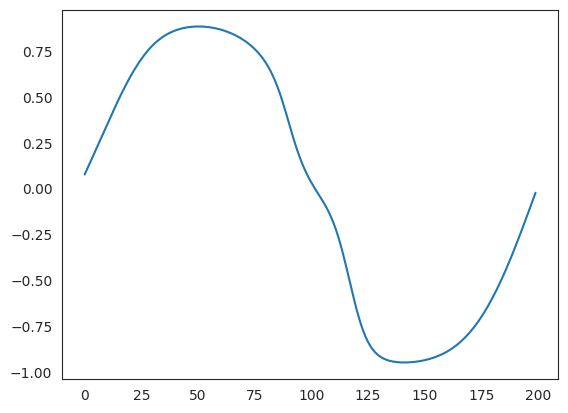

In [133]:
#I.C
plt.plot(y_pred_inverse[:,0])

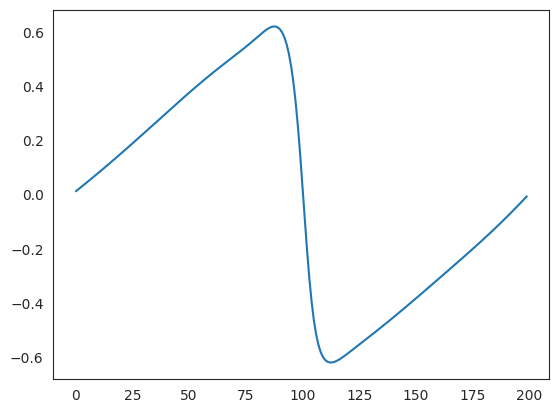

In [134]:
plt.plot(y_pred_inverse[:,-1])

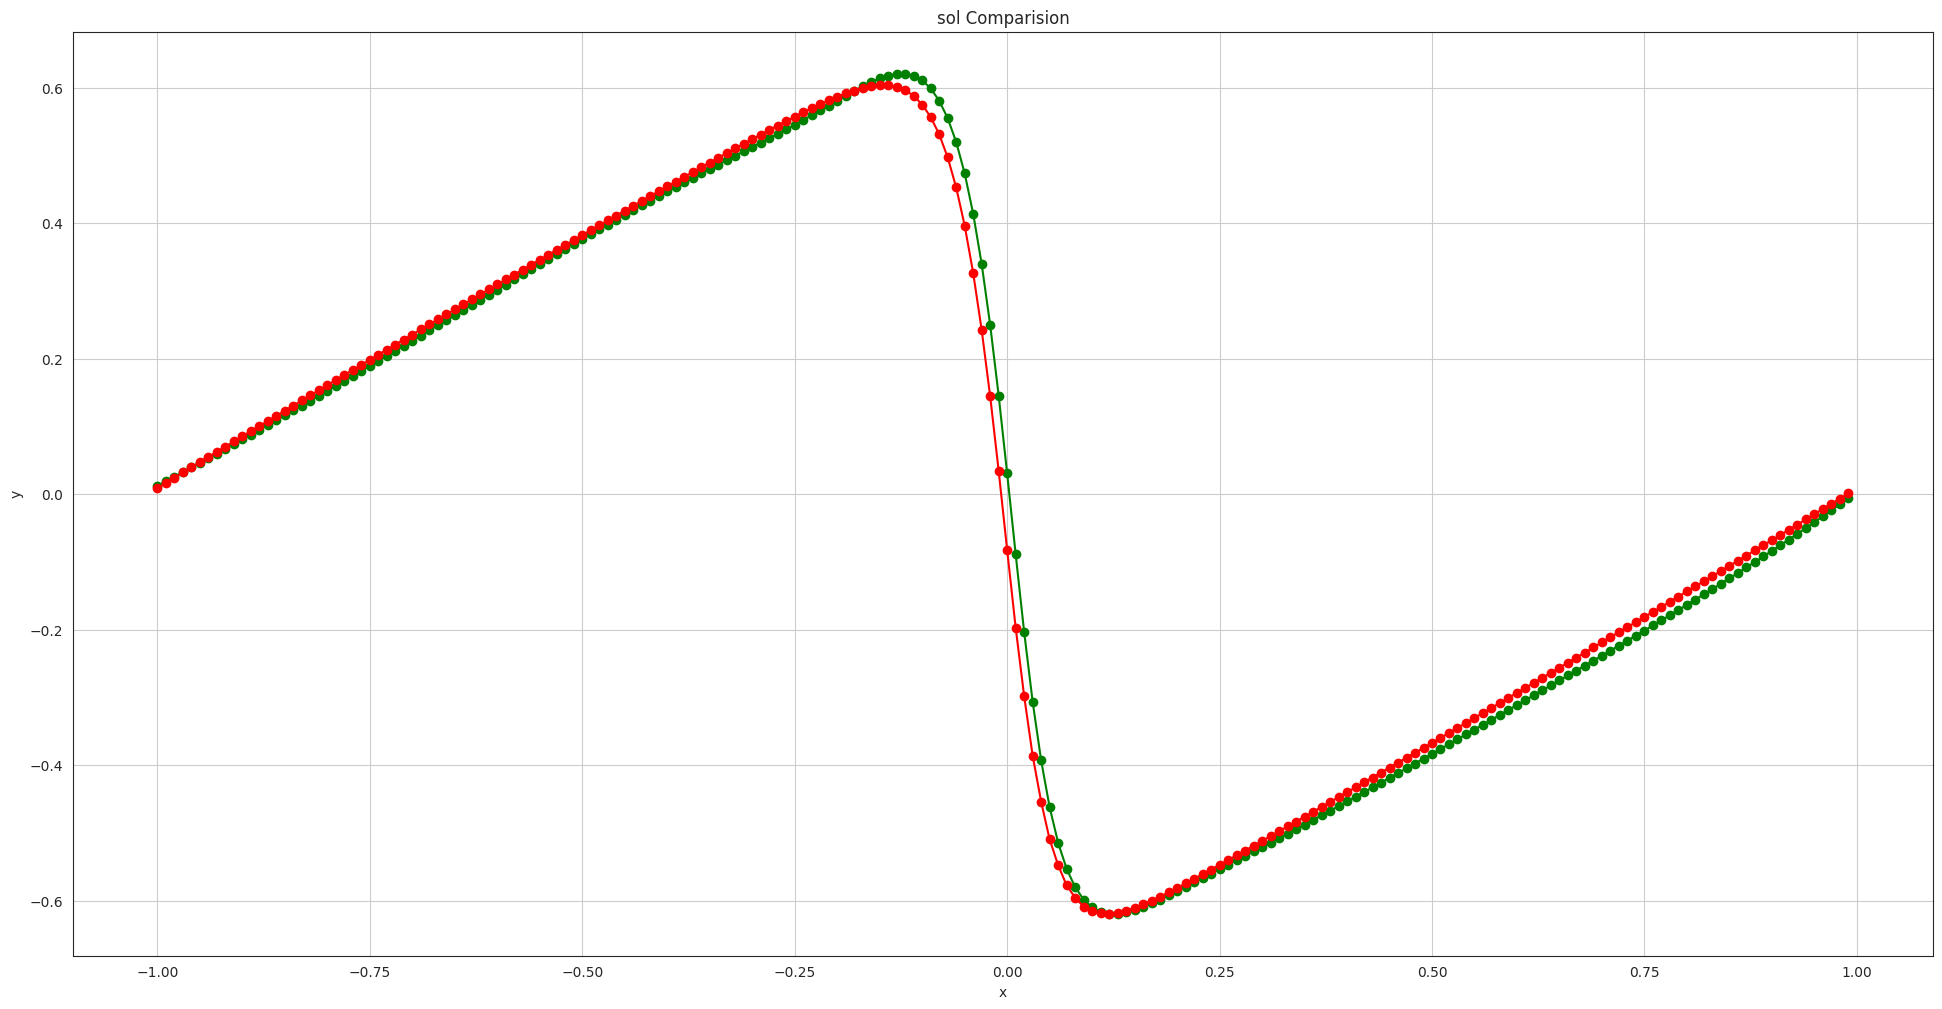

In [135]:
plt.figure(figsize=(24,12))
plt.plot(x, y_pred_inverse[:,-1], '-o', color = 'g') #IPINNs
plt.plot(x, uf[-1], '-o', color = 'r') #TVD
plt.title("sol Comparision")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [136]:
sns.set_style("white")
plt.figure(figsize=(5,3), dpi=3000)
sns.heatmap(y_pred_inverse, cmap='jet')

<Axes: >

In [137]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.net = torch.nn.Sequential(
            nn.Linear(2,20),
            nn.Tanh(),
            nn.Linear(20,30),
            nn.Tanh(),
            nn.Linear(30,30),
            nn.Tanh(),
            nn.Linear(30,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,1)
        )

    def forward(self, x):
        out = self.net(x)
        return out

In [138]:
class Net:
    def __init__(self):
        device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

        self.model = NN().to(device)

        # comp. domain
        self.h = 0.1
        self.k = 0.1
        x = torch.arange(-1,1+self.h, self.h)
        t = torch.arange(0,1+self.k, self.k)

        self.X = torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T

        # train data
        bc1 = torch.stack(torch.meshgrid(x[0],t)).reshape(2,-1).T
        bc2 = torch.stack(torch.meshgrid(x[-1],t)).reshape(2,-1).T
        ic  = torch.stack(torch.meshgrid(x,t[0])).reshape(2,-1).T
        self.X_train = torch.cat([bc1, bc2, ic])

        y_bc1 = torch.zeros(len(bc1))
        y_bc2 = torch.zeros(len(bc2))
        y_ic  = -torch.sin(math.pi * ic[:,0])
        print(y_ic)

        self.y_train = torch.cat([y_bc1, y_bc2, y_ic])
        self.y_train = self.y_train.unsqueeze(1)

        self.X = self.X.to(device)
        self.y_train = self.y_train.to(device)
        self.X_train = self.X_train.to(device)
        self.X.requires_grad = True

        # optimizer setting
        self.adam =  torch.optim.Adam(self.model.parameters())
        #Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS)
        self.optimizer = torch.optim.LBFGS(
            self.model.parameters(),
            lr=1.0,
            max_iter = 50000,
            max_eval = 50000,
            history_size = 50,
            tolerance_grad = 1e-15,
            tolerance_change = 1.0* np.finfo(float).eps,
            line_search_fn ="strong_wolfe"
        )

        self.criterion = torch.nn.MSELoss()
        self.iter = 1

    def loss_func(self):
        self.adam.zero_grad()
        self.optimizer.zero_grad()

        y_pred = self.model(self.X_train)
        loss_data = self.criterion(y_pred,self.y_train)

        u = self.model(self.X)

        du_dX = torch.autograd.grad(
            u,
            self.X,
            grad_outputs = torch.ones_like(u),
            create_graph = True,
            retain_graph = True
        )[0]

        #print(du_dX)
        #print("xxxxxxxxxxxxxxxxxxxxxxxxx")
        #print(du_dX[0])

        du_dt = du_dX[:,1]
        du_dx = du_dX[:,0]

        du_dXX = torch.autograd.grad(
            du_dX,
            self.X,
            grad_outputs = torch.ones_like(du_dX),
            create_graph = True,
            retain_graph = True
        )[0]

        du_dxx = du_dXX[:,0]

        #loss_pde = self.criterion(du_dt + 1*u.squeeze()*du_dx , (0.01/math.pi) * du_dxx)
        loss_pde = self.criterion(du_dt + 1*u.squeeze()*du_dx , (0.02) * du_dxx)

        loss = loss_pde + loss_data
        loss.backward()

        if self.iter % 100 == 0:
            print(self.iter, loss.item())
        self.iter = self.iter+1

        return loss

    def train(self):
        self.model.train()
        for i in range(3000):
            self.adam.step(self.loss_func)
        self.optimizer.step(self.loss_func)

    def eval_(self):
        self.model.eval()

In [139]:
# training
net = Net()
net.train()
net.model.eval()

tensor([-8.7423e-08,  3.0902e-01,  5.8779e-01,  8.0902e-01,  9.5106e-01,
         1.0000e+00,  9.5106e-01,  8.0902e-01,  5.8779e-01,  3.0902e-01,
         9.3627e-09, -3.0902e-01, -5.8779e-01, -8.0902e-01, -9.5106e-01,
        -1.0000e+00, -9.5106e-01, -8.0902e-01, -5.8779e-01, -3.0902e-01,
         8.7423e-08])
100 0.16483105719089508
200 0.06705103069543839
300 0.03696896880865097
400 0.027556704357266426
500 0.02047840878367424
600 0.015544234775006771
700 0.013082093559205532
800 0.010722868144512177
900 0.0094089200720191
1000 0.009373169392347336
1100 0.007791658863425255
1200 0.007186621427536011
1300 0.010440744459629059
1400 0.006364694330841303
1500 0.00568493502214551
1600 0.005327332299202681
1700 0.005828875117003918
1800 0.004684428684413433
1900 0.004669912159442902
2000 0.0041426559910178185
2100 0.005631620995700359
2200 0.003665152471512556
2300 0.007633454166352749
2400 0.00324124563485384
2500 0.0030687409453094006
2600 0.003078354988247156
2700 0.002787331584841013

NN(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=30, bias=True)
    (3): Tanh()
    (4): Linear(in_features=30, out_features=30, bias=True)
    (5): Tanh()
    (6): Linear(in_features=30, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): Tanh()
    (10): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [140]:
h = 0.01
k = 0.01

x = torch.arange(-1,1,h)
t = torch.arange(0,1,k)

X= torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T
X= X.to(net.X.device)

model = net.model
model.eval()
with torch.no_grad():
    y_pred = model(X)
    y_pred = y_pred.reshape(len(x),len(t)).cpu().numpy()

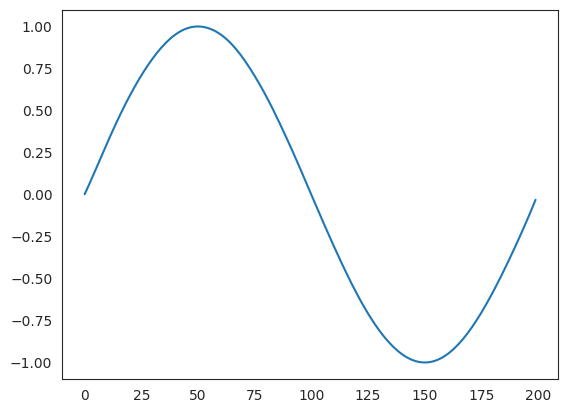

In [141]:
plt.plot(y_pred[:,0])

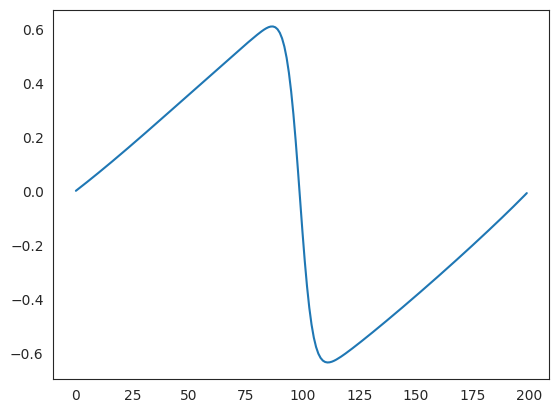

In [142]:
plt.plot(y_pred[:,-1])

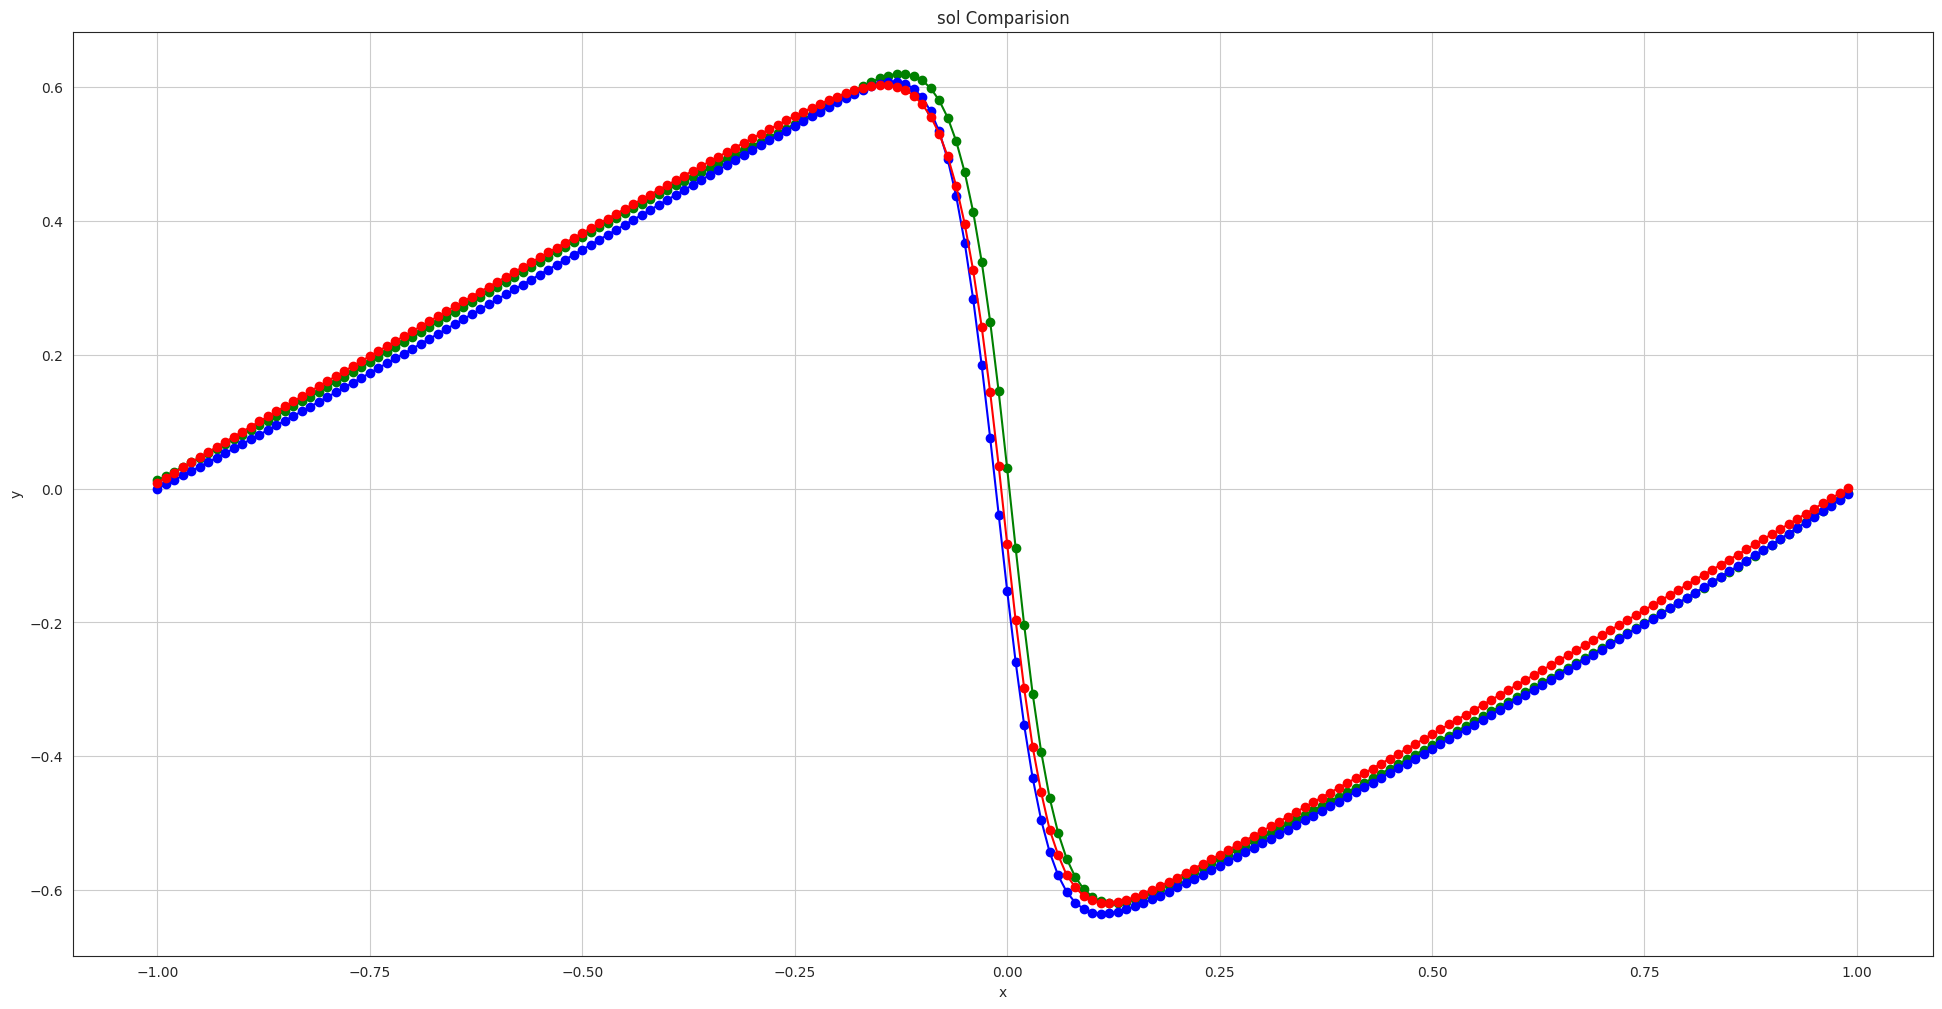

In [143]:
plt.figure(figsize=(24,12))

plt.plot(x, y_pred_inverse[:,-1], '-o', color = 'g') #IPINNs
plt.plot(x, y_pred[:,-1], '-o', color = 'b') #PINNs
plt.plot(x, uf[-1], '-o', color = 'r') #TVD

plt.title("sol Comparision")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()